In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import statistics
from statistics import mode

# Read in data files

In [ ]:
# Uncomment the code below when running for the first time 

# charts = pd.read_csv('datasets/charts.csv')
# charts.date = pd.to_datetime(charts.date)
# start_date = '2019-01-01'
# end_date = '2021-07-17'
# mask = (charts['date'] >= start_date) & (charts['date'] <= end_date)
# charts = charts.loc[mask]
# songs_and_artist = charts[['song', 'weeks-on-board', 'artist', 'date']].groupby(
#     ['song', 'artist']).max().sort_values(by='date', ascending=False)
# songs_and_artist.reset_index(level=['song', 'artist'], inplace=True)
# songs_and_artist.describe()


In [3]:
# After storing the data from API we can load the dataset directly from the csv file 
songs_and_artist = pd.read_csv('datasets/lyrics_and_genre.csv')


In [ ]:
songs_and_artist.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,song,artist,weeks-on-board,date,json_genre,lyrics
0,0,0,0,Rapstar,Polo G,13,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",[Intro]\n(Shout out my nigga Synco)\n\n[Chorus...
1,1,1,1,Straightenin,Migos,8,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...","[Intro: Quavo]\n(DJ Durel)\n(Ayy Castro, go cr..."
2,2,2,2,Ball If I Want To,DaBaby,3,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",[Intro]\n(If I want to)\n(If I want to)\n(If I...
3,3,3,3,Happier,Olivia Rodrigo,7,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",[Verse 1]\nWe broke up a month ago\nYour frien...
4,4,4,4,Hats Off,"Lil Baby, Lil Durk & Travis Scott",5,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...","[Intro]\nWhat's happenin', Chi Chi?\n\n[Verse ..."


# Fetch the corresponding genre for each song from discogs API
## Search for genre and lyrics by artist and name of the song 

In [ ]:
# Uncomment the code below when running for the first time 

# # !pip install lyricsgenius
# # !pip install ratelimit
# import requests
# from lyricsgenius import Genius
# from ratelimit import limits, sleep_and_retry

# # calls per minute
# CALLS = 60
# RATE_LIMIT = 70


# # Params for genre API
# URL = 'https://api.discogs.com/database/search?'
# api_key = 'inTtqFRUynYdTaZnVvYz'
# api_secret = 'CshyGbZvbkPxHiJuxfuqNEYdAQhqGwGR'

# # Params for lyrics API
# genius = Genius(
#     "7Ise90s_tMVx4jQroYGWIOaskQOTBFiCh3G9J8CtgLKBK65cXk3HNFEVMYNMoGBd")


# # Fetch genre information
# @sleep_and_retry
# @limits(calls=CALLS, period=RATE_LIMIT)
# def search(song, artist):
#     params = {
#         'release_title': song.replace('+', ' '),
#         'artist': artist,
#         'key': api_key,
#         'secret': api_secret
#     }
#     response = requests.get(URL, params=params)
#     # print(response.url)
#     return response.json()

# songs_and_artist['json_genre'] = songs_and_artist.apply(
#     lambda x: search(x.song, x.artist), axis=1)


# # Fetch lyrics
# lyrics = []
# for i in range(len(songs_and_artist)):
#     try:
#         song = genius.search_song(
#             songs_and_artist.iloc[i, 0], songs_and_artist.iloc[i, 1])
#         lyrics.append(song.lyrics)
#     except:
#         lyrics.append('empty')
#         pass
# songs_and_artist['lyrics'] = lyrics

# # Export dataframe to csv file
# songs_and_artist.to_csv('datasets/lyrics_and_genre.csv')

# songs_and_artist.head()


In [ ]:
# Uncomment the code below when running for the first time 
# The fuction below detects how many responses we get from the server

# import json


# def filternone(row):
#     try:
#         row = json.loads(row)
#         print(row)
#         if row['results'] == []:
#             return 'no result'
#         else:
#             return 'server responsed'
#     except:
#         return 'no response from server'
# songs_and_artist['result'] = songs_and_artist['json_genre'].apply(filternone)

# songs_and_artist.result.value_counts()

# Features Engineering

In [4]:
def genres_func(Genre):
    genres_text = re.findall(r"'genre': \['(.+?)'\]", str(Genre))
    return genres_text

def counter(row):
    if len(row) > 0:
        return max(set(row), key=row.count)
    else:
        return None
        # return dict.C[0]

def country_func(Country):
    counrty_text = re.findall(r"'country': '(.+?)'", str(Country))
    return counrty_text

def format_func(form):
    format_text = re.findall(r"'format': (.+?]),", str(form))
    return format_text

def comm_func(Comm):
    community_text = re.findall(r"'community': (.+?}),", str(Comm))
    return community_text




# Append a genres column that contain the name of the genres based on query result
songs_and_artist['genres'] = songs_and_artist.apply(
    lambda row: genres_func(row['json_genre']), axis=1)

# Store the most frequent genre in the genre column
songs_and_artist['genre'] = songs_and_artist.apply(
    lambda row: counter(row['genres']), axis=1)

songs_and_artist['country'] = songs_and_artist.apply(
    lambda row: country_func(row['json_genre']), axis=1)

songs_and_artist['format'] = songs_and_artist.apply(
    lambda row: format_func(row['json_genre']), axis=1)

songs_and_artist['community'] = songs_and_artist.apply(
    lambda row: comm_func(row['json_genre']), axis=1)


# drop songs of which lyrics can't be found
songs_and_artist = songs_and_artist[songs_and_artist["lyrics"] != "empty"]

# drop songs of which genre can't be found
songs_and_artist = songs_and_artist[songs_and_artist["genres"].apply(lambda x: x != [])]

## Clean Country Data

In [5]:
def get_freq_country(countries):
    # print(format)
    if len(countries) >0:
        temp = re.sub(r'[\[\]\(\)\\\"\' ]', '', str(countries))
        words = temp.split(',')
        if len(words) > 0:
            x = max(set(words), key=words.count)
            return x
            
        else: 
            return None
    else:
        return None

songs_and_artist['frequent_country'] = songs_and_artist.apply(
    lambda row: get_freq_country(row['country']), axis=1)

## Clean Community Data

In [6]:
def comm_want_num(Comm):
    community_want_text = re.findall(r"'want': (\d+),", str(Comm))
    # print(community_want_text)
    want_temp = re.sub(r'[\[\]\(\)\"\' ]', '', str(community_want_text))
    # print(want_temp)
    want_parts = want_temp.split(',')
    if len(want_parts) >0:
        # print(want_parts)
        int_want_parts = map(int, want_parts)
        return (sum(int_want_parts)/len(want_parts)) 
    else:
        return None

def comm_have_num(Comm):
    community_have_text = re.findall(r"'have': (\d+)", str(Comm))
    # print(community_have_text)
    have_temp = re.sub(r'[\[\]\(\)\"\' ]', '', str(community_have_text))
    # print(have_temp)
    have_parts = have_temp.split(',')
    if len(have_parts) >0:
        # print(have_parts)
        int_have_parts = map(int, have_parts)
        return (sum(int_have_parts)/len(have_parts)) 
    else:
        return None


# apply on columns
songs_and_artist['comm_want_num'] = songs_and_artist.apply(
    lambda row: comm_want_num(row['community']), axis=1)

songs_and_artist['comm_have_num'] = songs_and_artist.apply(
    lambda row: comm_have_num(row['community']), axis=1)

In [7]:
songs_and_artist.head(30)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,song,artist,weeks-on-board,date,json_genre,lyrics,genres,genre,country,format,community,frequent_country,comm_want_num,comm_have_num
0,0,0,0,Rapstar,Polo G,13,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",[Intro]\n(Shout out my nigga Synco)\n\n[Chorus...,[Hip Hop],Hip Hop,[Unknown],"[['File', 'AAC', 'Single']]","[{'want': 0, 'have': 4}]",Unknown,0.000000,4.000000
1,1,1,1,Straightenin,Migos,8,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...","[Intro: Quavo]\n(DJ Durel)\n(Ayy Castro, go cr...",[Hip Hop],Hip Hop,[Unknown],"[['File', 'AAC', 'Single']]","[{'want': 1, 'have': 4}]",Unknown,1.000000,4.000000
2,2,2,2,Ball If I Want To,DaBaby,3,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",[Intro]\n(If I want to)\n(If I want to)\n(If I...,[Hip Hop],Hip Hop,[Unknown],"[['File', 'AAC', 'Single']]","[{'want': 0, 'have': 2}]",Unknown,0.000000,2.000000
5,5,5,5,Tell Em,Cochise & $NOT,4,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...","[Intro: Cochise]\nUh, yeah\nYeah, yo, yo\nYo, ...",[Hip Hop],Hip Hop,[Unknown],"[['File', 'AAC', 'Single']]","[{'want': 3, 'have': 1}]",Unknown,3.000000,1.000000
6,6,6,6,Telepatia,Kali Uchis,20,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",Lyrics for this song are currently unavailable...,"[Latin', 'Funk / Soul]","Latin', 'Funk / Soul",[Unknown],"[['File', 'AAC', 'Single']]","[{'want': 1, 'have': 0}]",Unknown,1.000000,0.000000
9,9,9,9,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,11,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...","[Verse 1]\nI got some money in my pocket, got ...","[Pop', 'Folk, World, & Country, Pop', 'Folk, W...","Pop', 'Folk, World, & Country","[US, US, US]","[['File', 'AAC', 'Single'], ['File', 'AAC', 'S...","[{'want': 0, 'have': 2}}, {'want': 0, 'have': ...",US,0.000000,1.333333
11,11,11,11,Beggin',Maneskin,2,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...","[Intro]\nPut your loving hand out, baby\n'Caus...",[Rock],Rock,[Unknown],"[['File', 'AAC', 'Single']]","[{'want': 0, 'have': 1}]",Unknown,0.000000,1.000000
13,13,13,13,Drivers License,Olivia Rodrigo,26,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",[Verse 1]\nI got my driver's license last week...,"[Pop, Pop, Pop]",Pop,"[Germany, Austria, & Switzerland, Europe, Germ...","[['CD', 'Single', 'Limited Edition'], ['File',...","[{'want': 125, 'have': 192}}, {'want': 11, 'ha...",&Switzerland,83.333333,128.000000
14,14,14,14,Heartbreak Anniversary,Giveon,21,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...",[Intro]\nOoh\n\n[Verse 1]\nBalloons are deflat...,[Funk / Soul],Funk / Soul,[Unknown],"[['File', 'AAC', 'Single']]","[{'want': 4, 'have': 3}]",Unknown,4.000000,3.000000
15,15,15,15,Heat Waves,Glass Animals,25,2021-07-17,"{'pagination': {'page': 1, 'pages': 1, 'per_pa...","[Intro]\n(Last night, all I think about is you...","[Electronic', 'Pop]","Electronic', 'Pop",[UK & Europe],"[['File', 'ALAC', 'Single']]","[{'want': 6, 'have': 6}]",UK&Europe,6.000000,6.000000


## Clean Format Data

In [8]:
def get_freq_format(format):
    if len(format) >0:
        temp = re.sub(r'[\[\]\(\)\\\"\' ]', '', str(format))
        words = temp.split(',')
        if len(words) > 0:
            return max(set(words), key=words.count)
        else: 
            return None
    else:
        return None

songs_and_artist['frequent_format'] = songs_and_artist.apply(
    lambda row: get_freq_format(row['format']), axis=1)

## Model 1: predicting the genre of the song based on lyrics and artist

In [17]:
data = songs_and_artist.copy()
counts = data['genre'].value_counts()
data = data[~data['genre'].isin(counts[counts < 35].index)]
data['genre'].value_counts()

Hip Hop                   152
Pop                        92
Folk, World, & Country     35
Name: genre, dtype: int64

In [18]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit


seed = 42
features = ['artist', 'lyrics', 'genre']
test_size = 0.2

# prepare data
datacopy0 = data.copy()

# preprocess lyrics
datacopy0['lyrics'] = datacopy0['lyrics'].apply(lambda x: re.sub(r'(\[.*?\]|\n)', ' ', x))



# train test split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)
for train_idx, test_idx in sss.split(datacopy0, datacopy0['genre']):
    strat_train_set = datacopy0.iloc[train_idx]
    strat_test_set = datacopy0.iloc[test_idx]

print(strat_train_set.shape, strat_test_set.shape)

X_train = strat_train_set.drop('genre', axis=1)
y_train = strat_train_set['genre'].copy()

X_test = strat_test_set.drop('genre', axis=1)
y_test = strat_test_set['genre'].copy()



(223, 18) (56, 18)


In [19]:
# vectorize lyrics and vectorizer
col_transformer = ColumnTransformer([
    ('lyrics_vec', TfidfVectorizer(stop_words="english", analyzer='word',
                                   ngram_range=(1, 2), max_df=1.0,
                                   min_df=1, max_features=None), 'lyrics'),
    ('artist_vec', TfidfVectorizer(stop_words="english", analyzer='word',
                                   ngram_range=(1, 2), max_df=1.0,
                                   min_df=1, max_features=None), 'artist')
])

# fit then transform lyrics and artist name column
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)


# from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

names = ["Nearest Neighbors",
         # "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "AdaBoost1"]

classifiers = [
    KNeighborsClassifier(2),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5, n_estimators=20), \
                       learning_rate=0.1, n_estimators=10)
]


for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name, accuracy * 100.0))



In [20]:
# Neural network clf
nn = MLPClassifier(alpha=1, max_iter=200, random_state= seed)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

# evaluate predictions
print('Accuracy Score Test', nn.score(X_test, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))


Accuracy Score Train:  1.0
Accuracy Score Test 0.8035714285714286
Confusion Matrix: 
 [[ 3  2  2]
 [ 0 31  0]
 [ 0  7 11]]
Classification Report: 
                         precision    recall  f1-score   support

Folk, World, & Country       1.00      0.43      0.60         7
               Hip Hop       0.78      1.00      0.87        31
                   Pop       0.85      0.61      0.71        18

              accuracy                           0.80        56
             macro avg       0.87      0.68      0.73        56
          weighted avg       0.83      0.80      0.79        56



## Model 2:  predict the Weeks-on-board with genre, artist, lyric, song name, artist's country, \# of people on discorg who owns this song, and \# of people on discorg wanting to own this song   

In [30]:
import re
from sklearn.preprocessing import StandardScaler

features = [
    "artist",
    "lyrics",
    "genre",
    "song",
    "frequent_country",
    "comm_want_num",
    "comm_have_num",
]


# prepare data 
# filter out songs that have weeks on board counts less than 2
datacopy1 = data.copy()
counts = datacopy1['weeks-on-board'].value_counts()
datacopy1 = datacopy1[~datacopy1['weeks-on-board'].isin(counts[counts < 7].index)]


# Define X and y
X = datacopy1[features]
y = datacopy1["weeks-on-board"]

# preprocess lyrics
X["lyrics"] = X["lyrics"].apply(lambda x: re.sub(r"(\[.*?\]|\n)", " ", x))

# transform text columns with vectorizer
col_transformer = ColumnTransformer([
    ('lyrics_vec', TfidfVectorizer(stop_words="english", analyzer='word',
                                   ngram_range=(1, 1), max_df=1.0,
                                   min_df=1, max_features=None), 'lyrics'),
    ('artist_vec', TfidfVectorizer(stop_words="english", analyzer='word',
                                   ngram_range=(1, 1), max_df=1.0,
                                   min_df=1, max_features=None), 'artist'),
    ('genre_vec', TfidfVectorizer(stop_words="english", analyzer='word',
                                  ngram_range=(1, 1), max_df=1.0,
                                  min_df=1, max_features=None), 'genre'),
    ('song_vec', TfidfVectorizer(stop_words="english", analyzer='word',
                                   ngram_range=(1, 1), max_df=1.0,
                                   min_df=1, max_features=None), 'song'),
    ('country_vec', TfidfVectorizer(stop_words="english", analyzer='word',
                                   ngram_range=(1, 1), max_df=1.0,
                                   min_df=1, max_features=None), 'frequent_country'),
    ("scaler", StandardScaler(), ["comm_want_num", "comm_have_num"])
])

def func(x):
    if 0 < x <= 10:
        return 'non_hit'
    else:
        return 'hit'

datacopy1['weeks-on-board'] = datacopy1['weeks-on-board'].apply(func)


# split train and test set
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)
for train_idx, test_idx in sss.split(datacopy1, datacopy1["weeks-on-board"]):
    strat_train_set = datacopy1.iloc[train_idx]
    strat_test_set = datacopy1.iloc[test_idx]

print(strat_train_set.shape, strat_test_set.shape)


X_train = strat_train_set.drop("weeks-on-board", axis=1)
y_train = strat_train_set["weeks-on-board"].copy()

X_test = strat_test_set.drop("weeks-on-board", axis=1)
y_test = strat_test_set["weeks-on-board"].copy()

# fit then transform text columns
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(148, 18) (37, 18)


In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression


names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "AdaBoost1"]

classifiers = [
    KNeighborsClassifier(2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5, n_estimators=20), \
                       learning_rate=0.1, n_estimators=10)
]

# regressors 
# check threshold: mean square error, high threshold

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name, accuracy * 100.0))



Nearest Neighbors Accuracy: 48.65%
Decision Tree Accuracy: 59.46%
Random Forest Accuracy: 70.27%
Neural Net Accuracy: 67.57%
AdaBoost Accuracy: 64.86%
AdaBoost1 Accuracy: 70.27%


In [32]:
from sklearn.metrics import plot_confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         hit       0.00      0.00      0.00        11
     non_hit       0.70      1.00      0.83        26

    accuracy                           0.70        37
   macro avg       0.35      0.50      0.41        37
weighted avg       0.49      0.70      0.58        37

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

In [33]:
import sklearn.metrics as metrics
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5, n_estimators=20), learning_rate=0.1, n_estimators=10)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
y_test.replace('non_hit',0, inplace = True)
y_test.replace('hit', 1, inplace = True)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

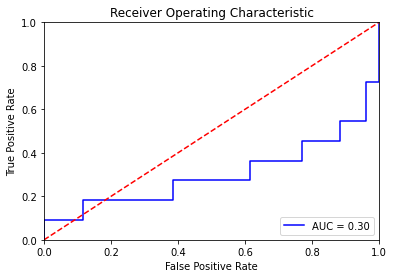

In [34]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77492079-5536-4eb2-89ec-9f09679980e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>